In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#models
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
#evaluation methods
from sklearn.metrics import *
#standardization methods
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
import statistics
#for cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")
from yellowbrick.classifier import ClassificationReport

# Data Exploration

In [2]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [3]:
#removing unnecessary index column
df=df.drop('Unnamed: 0',axis=1)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
df["age"]

0      66.0
1      56.0
2      46.0
3      60.0
4      58.0
       ... 
858    24.0
859    35.0
860    49.4
861    49.4
862    70.0
Name: age, Length: 863, dtype: float64

In [5]:
df["age"] = df["age"].astype(int)
df["age"]

0      66
1      56
2      46
3      60
4      58
       ..
858    24
859    35
860    49
861    49
862    70
Name: age, Length: 863, dtype: int32

<AxesSubplot:>

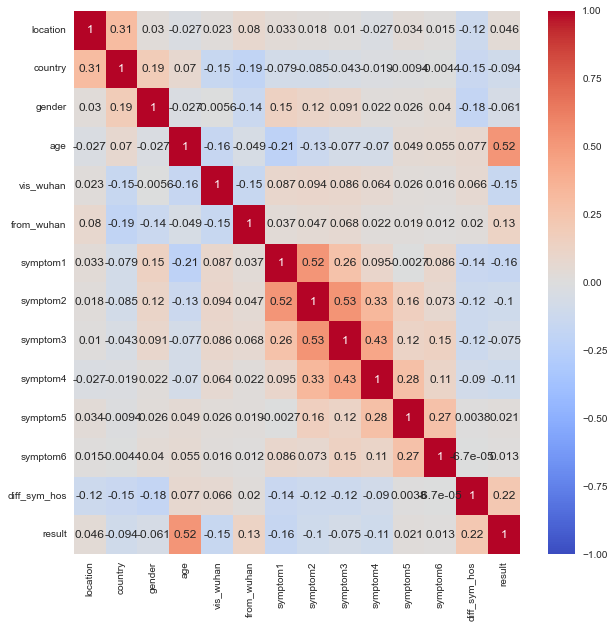

In [6]:
#Heatmap to check Correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,vmax=1, vmin=-1)

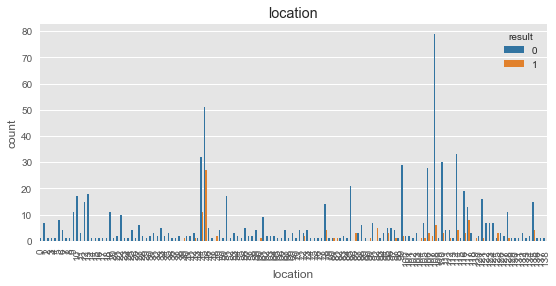

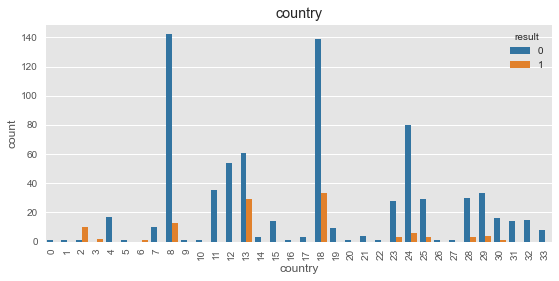

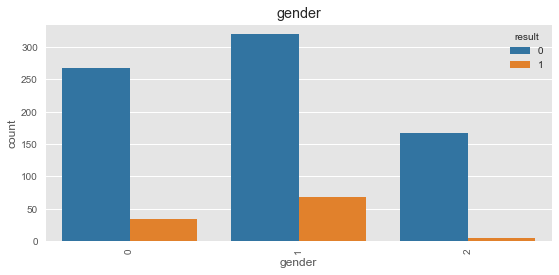

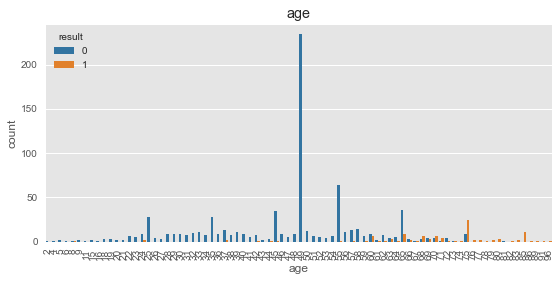

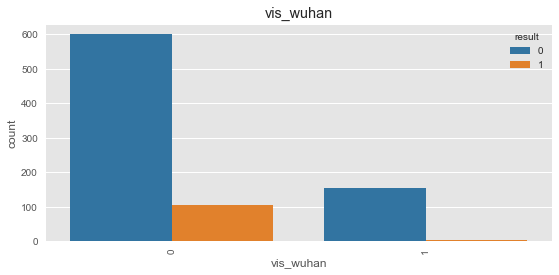

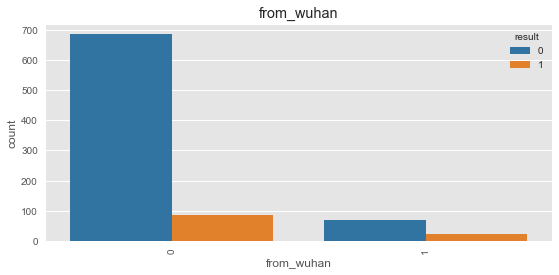

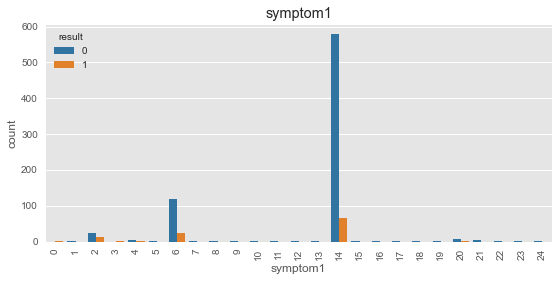

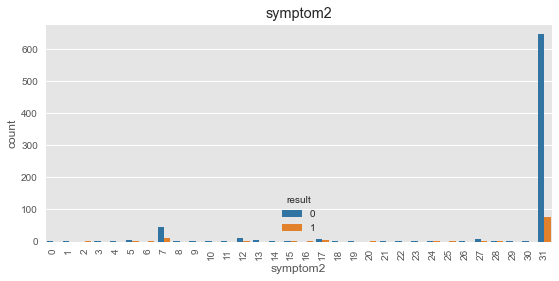

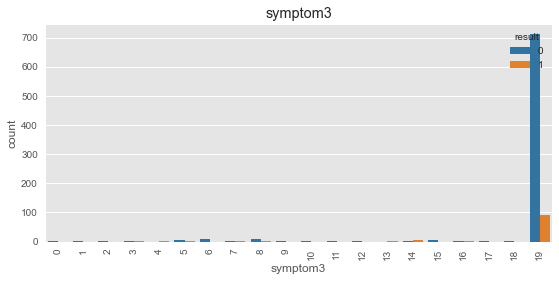

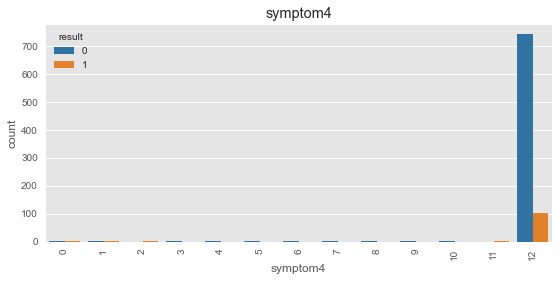

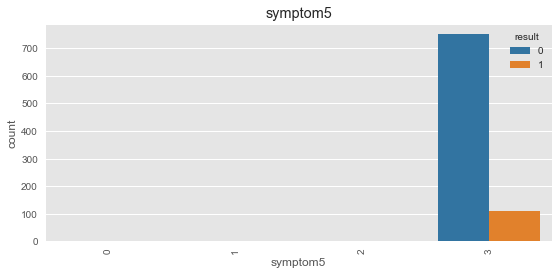

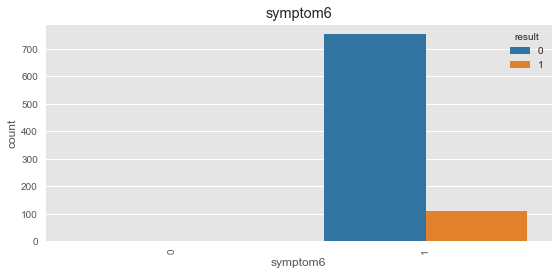

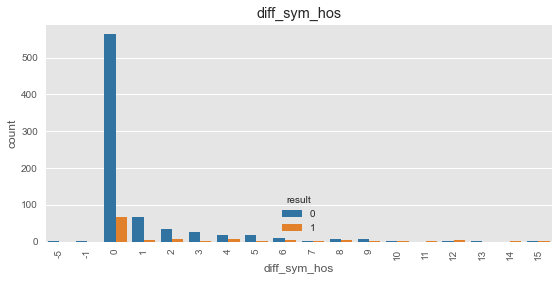

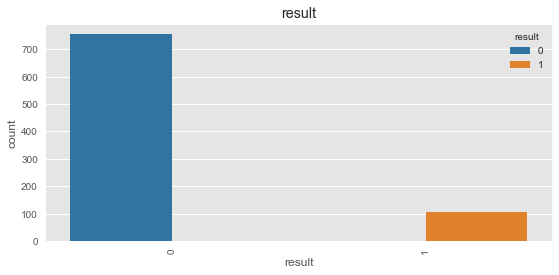

In [7]:
#visualizing relations between each feature nd the Target column "result" 
plt.style.use("ggplot")
for column in df.columns:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(df[column], hue=df["result"],palette='tab10')
    plt.title(column)    
    plt.xticks(rotation=90)

We can see from the figures that the data is highly imbalanced and most of the label column values are 0 whiich is why Recall is a more suitable meteric than percesion

# Splitting and Scaling the data

In [8]:
# Split the label from the features
X = df.drop('result', axis=1)
y = df['result']

'''the stratify attribute of the train_test_split function splits the class proportionally between training and test set
to help with the imbalance issue.'''
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1, stratify=y)
print(X_train.shape)
print(X_test.shape)

(690, 13)
(173, 13)


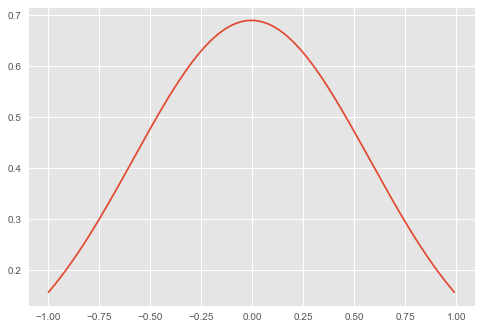

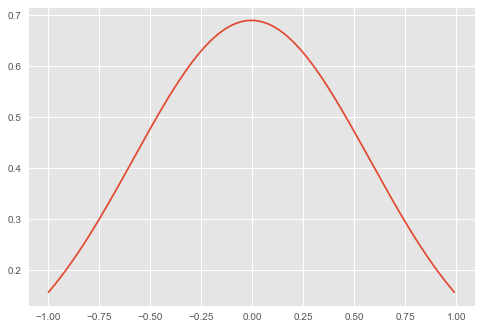

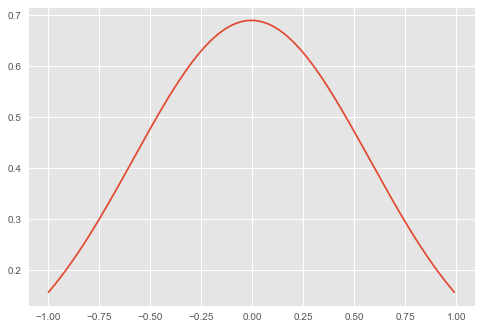

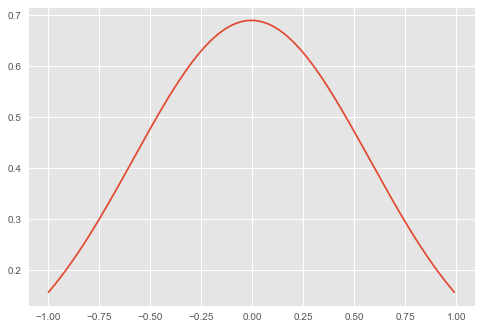

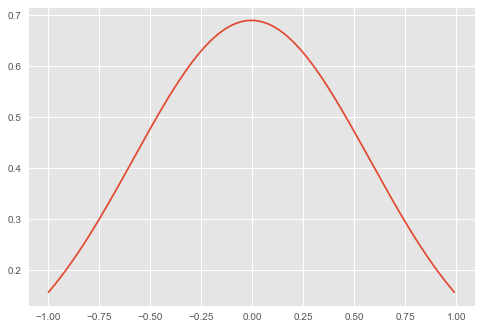

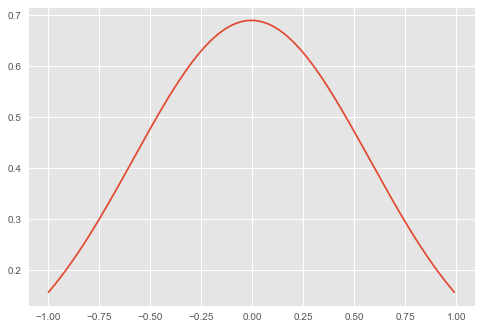

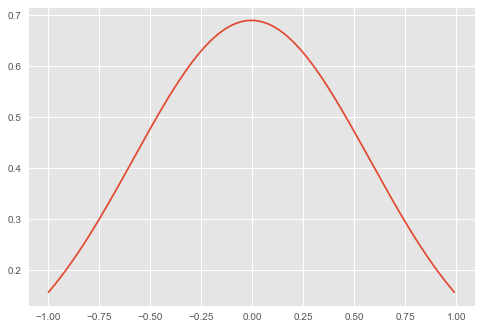

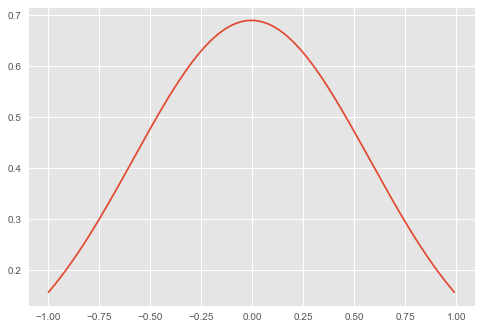

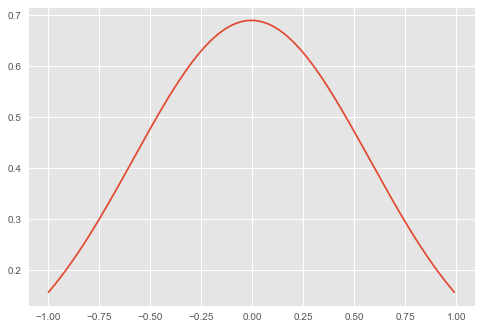

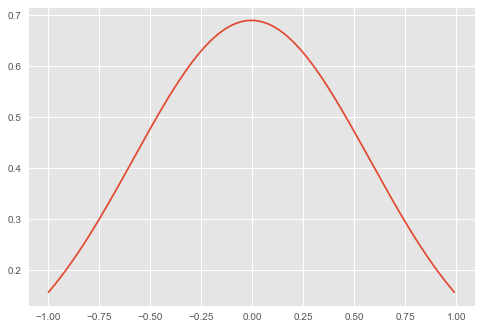

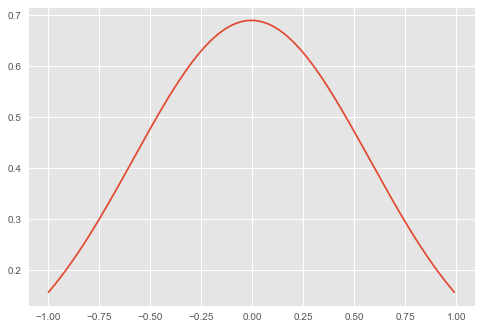

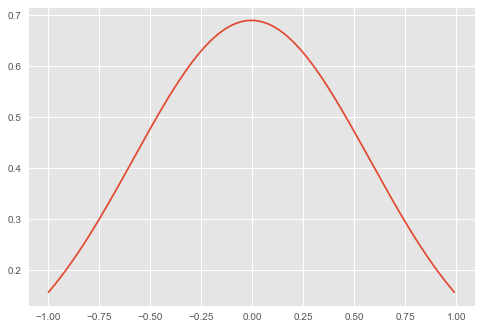

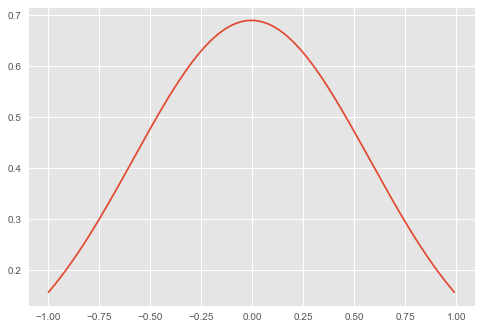

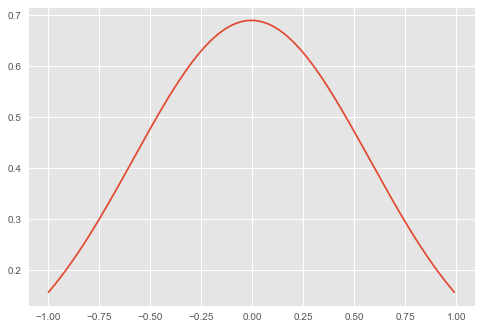

In [9]:
#Checking the distribution to determine Scaling method
for x in df:  
  x_axis = np.arange(-1, 1, 0.01)
  mean = statistics.mean(x_axis)
  sd = statistics.stdev(x_axis)
    
  plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
  plt.show()

we can see that the data is normally distributed

In [10]:
#We used Standard Scaler as all feature are  normally distributed 
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
print(X_train,X_test)

[[ 0.93266532  1.53832489  1.57002126 ...  0.06116084  0.03809697
  -0.41482357]
 [ 1.00855138  0.14285627  0.18647762 ...  0.06116084  0.03809697
  -0.41482357]
 [-1.39450715  0.14285627  0.18647762 ...  0.06116084  0.03809697
   0.8921548 ]
 ...
 [ 1.03384674 -1.25261235 -1.19706602 ...  0.06116084  0.03809697
  -0.41482357]
 [ 0.93266532  1.53832489  1.57002126 ...  0.06116084  0.03809697
  -0.41482357]
 [-1.64746067 -0.61830843  0.18647762 ...  0.06116084  0.03809697
  -0.41482357]] [[ 0.45205362  0.14285627 -1.19706602 ...  0.06116084  0.03809697
  -0.41482357]
 [ 1.48916309  1.03088176 -1.19706602 ...  0.06116084  0.03809697
  -0.41482357]
 [ 0.19910009 -0.61830843  1.57002126 ...  0.06116084  0.03809697
  -0.41482357]
 ...
 [ 0.55323503 -1.12575156  0.18647762 ...  0.06116084  0.03809697
   0.45649534]
 [ 1.03384674 -1.25261235 -1.19706602 ...  0.06116084  0.03809697
  -0.41482357]
 [-1.72334673 -0.61830843  0.18647762 ...  0.06116084  0.03809697
  -0.41482357]]


In [11]:
def metrics(model):
  '''Calculating different meterics'''
  #Calculating classification Report (precision, recall, f1-score, accuracy) on test set  
  classes = ['0' , '1']
  visualizer = ClassificationReport(model, classes=classes, support=True,cmap='Blues')

  visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
  visualizer.score(X_test, y_test)        # Evaluate the model on the test data
  visualizer.show()                     # Finalize and show the figure

 #ROC
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])       
  roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
  plt.plot(fpr, tpr, 'r', label = 'AUC = %0.4f' % roc_auc)                        #plotting AUC and ROC curves
  plt.plot(fpr, tpr, color='red', label='')
  plt.plot([0, 1], [0, 1], color='green', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(' ROC Curve')
  plt.legend(loc = 'lower right')
  plt.show()


# 1- K-Nearest Neighbor

Best parameter for K-Nearest Neighbors 
{'n_neighbors': 1, 'weights': 'uniform'}


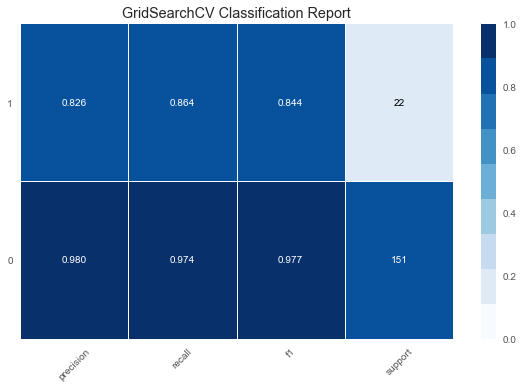

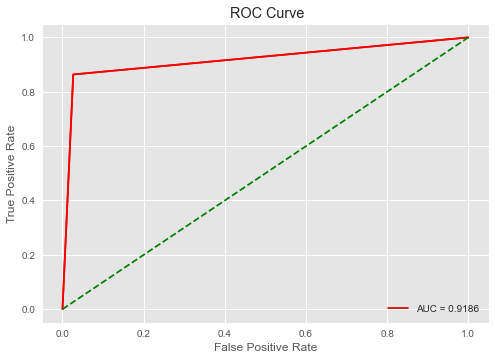

In [12]:
Knn = KNeighborsClassifier()
#setting parameters
KNN_param = {}
KNN_param['n_neighbors'] = list(range(1,50))
KNN_param['weights'] =['uniform', 'distance']
#training
gs_knn = GridSearchCV(Knn, KNN_param, cv=5,scoring='recall').fit(X_train, y_train)
print("Best parameter for K-Nearest Neighbors " )
print(gs_knn.best_params_)
metrics(gs_knn)

# 2-Logistic Regression

Best parameter for Logistic Regression
{'C': 10, 'penalty': 'l2', 'solver': 'sag'}


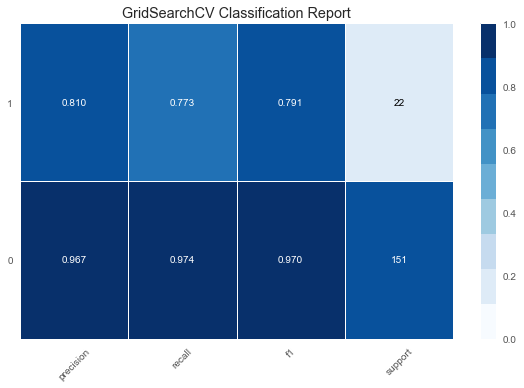

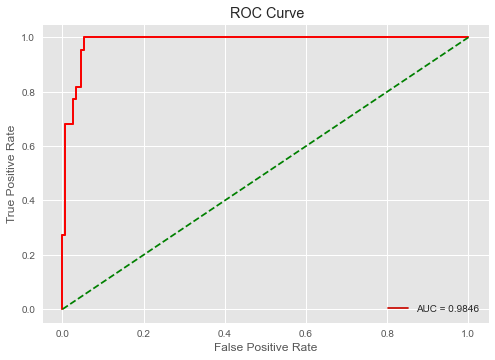

In [13]:
LogReg = LogisticRegression()
#setting parameters
LogReg_param = {}
LogReg_param['C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
LogReg_param['penalty'] = ['l1', 'l2']
LogReg_param['solver'] =['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#training and grid search
gs_lr = GridSearchCV(LogReg, LogReg_param, cv=5, scoring='recall').fit(X_train, y_train)
print("Best parameter for Logistic Regression" )
print(gs_lr.best_params_)
metrics(gs_lr)

# 3-Naive Bayes

Best parameter for Naïve Bayes
{'var_smoothing': 1e-09}


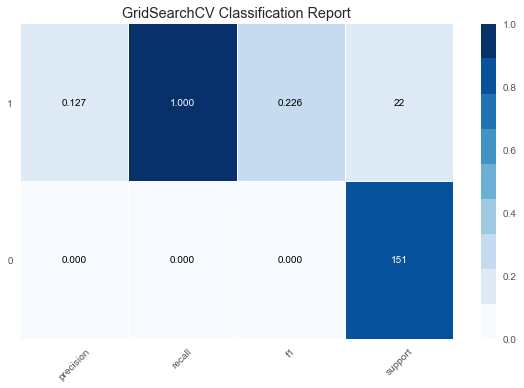

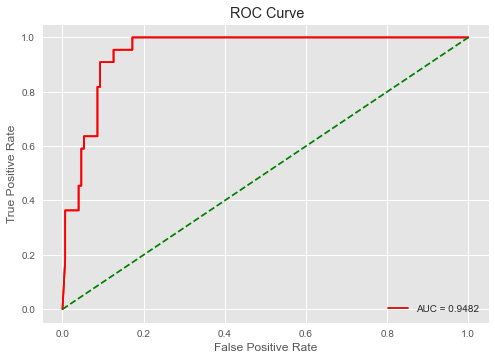

In [14]:
NB = GaussianNB()
NB_param = {}
NB_param['var_smoothing']= [1e-9]
gs_nb = GridSearchCV(NB, NB_param, cv=5, scoring='recall').fit(X_train, y_train)
print("Best parameter for Naïve Bayes" )
print(gs_nb.best_params_)
metrics(gs_nb)

# 4- Decision Tree

Best parameter for Decision Trees
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}


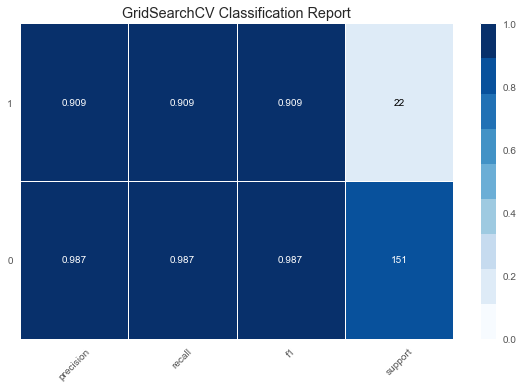

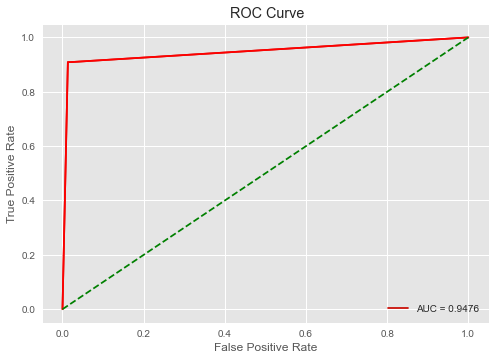

In [15]:
DT = DecisionTreeClassifier()
DT_param = {}
DT_param['max_depth'] = list(range(2,25))
DT_param['min_samples_split'] = list(range(2,15))
DT_param['criterion'] = ['gini', 'entropy']   
gs_dt = GridSearchCV(DT, DT_param, cv=5, scoring='recall').fit(X_train, y_train)
print("Best parameter for Decision Trees" )
print(gs_dt.best_params_)
metrics(gs_dt)

# 5-Support Vector Machine

Best parameter for SVM
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


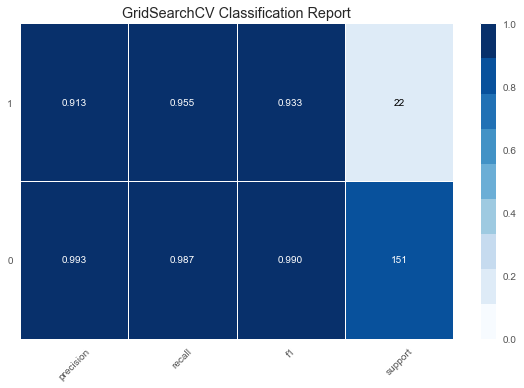

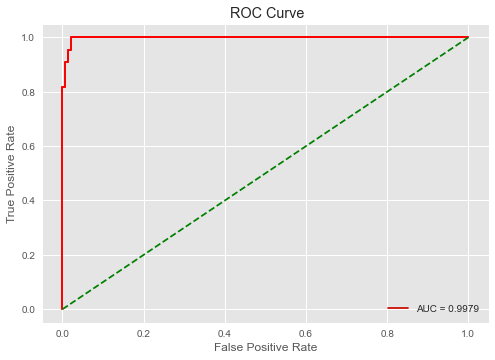

In [16]:
SVM = SVC(probability=True)
SVM_param = {}
SVM_param['C'] = [0.1, 1, 10, 100, 1000]
SVM_param['kernel'] = ['linear', 'poly','rbf', 'sigmoid']
SVM_param['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]
gs_sv = GridSearchCV(SVM, SVM_param, cv=5, scoring='recall').fit(X_train, y_train)
print("Best parameter for SVM" )
print(gs_sv.best_params_)
metrics(gs_sv)